# Compute MIDs from peak areas

In [33]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import binom
import seaborn as sns

In [2]:
input_data_path = Path('00_input_data')
mid_data_path = Path('01_mid_data')

In [3]:
def import_peak_areas(file_name: str) -> pd.DataFrame:
    peak_areas = pd.read_csv(file_name, sep=';', header=[0,1], index_col=[0,1,2,3,4])\
        .fillna(0)
    # for some reason pd.read_csv discards the index level names
    peak_areas.index.set_names(
        ['matrix', 'cell_type', 'time_minutes', 'with_standards', 'replicate_nr'],
        inplace=True
    )
    peak_areas.columns.set_names(
        ['metabolite', 'mi'],
        inplace=True
    )
    return peak_areas.sort_index()

In [4]:
def normalize_to_mids(peak_areas: pd.DataFrame) -> pd.DataFrame:
    peak_areas_sum = peak_areas.T.groupby(level=0).sum().T
    return peak_areas.divide(peak_areas_sum, axis=0, level=0)

## Homocysteine

In [5]:
hcys_peak_areas = import_peak_areas(input_data_path / 'D4-hcys_peak_areas.csv')
hcys_peak_areas.head(5)

metabolite                                                  hcys        cyst  \
mi                                                             0     4     0   
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1             179.0  6807  2980   
                                             2             130.0  5657  2998   
                 15           0              1             132.0  5822  3002   
                                             2             114.0  7127  3889   
                 30           0              1             181.0  6741  3185   

metabolite                                                         cys   met  \
mi                                                             4     0     0   
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1               0.0  3750  1639   
                                             2               0.0  3439  1919   
                 15           0              1               0.0  3857  1992   
                                             2               0.0  4083  1881   
                 30           0              1             110.0  5077  4022   

metabolite                                                          sam  \
mi                                                           4        0   
matrix cell_type time_minutes with_standards replicate_nr                 
Cells  BJ-RAS    5            0              1             325   7500.0   
                                             2             458   6310.0   
                 15           0              1             393   8619.0   
                                             2             435   9505.0   
                 30           0              1             640  10590.0   

metabolite                                                            sah  \
mi                                                              4       0   
matrix cell_type time_minutes with_standards replicate_nr                   
Cells  BJ-RAS    5            0              1              490.0  2800.0   
                                             2              405.0  2802.0   
                 15           0              1             1030.0  2689.0   
                                             2             1311.0  3294.0   
                 30           0              1             2632.0  1581.0   

metabolite                                                        
mi                                                             4  
matrix cell_type time_minutes with_standards replicate_nr         
Cells  BJ-RAS    5            0              1             289.0  
                                             2             316.0  
                 15           0              1             473.0  
                                             2             682.0  
                 30           0              1             473.0

In [6]:
hcys_mids = normalize_to_mids(hcys_peak_areas)
hcys_mids.head(5)

metabolite                                                     hcys            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.025623  0.974377   
                                             2             0.022464  0.977536   
                 15           0              1             0.022170  0.977830   
                                             2             0.015744  0.984256   
                 30           0              1             0.026149  0.973851   

metabolite                                                     cyst            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             1.000000  0.000000   
                                             2             1.000000  0.000000   
                 15           0              1             1.000000  0.000000   
                                             2             1.000000  0.000000   
                 30           0              1             0.966616  0.033384   

metabolite                                                 cys       met  \
mi                                                           0         0   
matrix cell_type time_minutes with_standards replicate_nr                  
Cells  BJ-RAS    5            0              1             1.0  0.834521   
                                             2             1.0  0.807320   
                 15           0              1             1.0  0.835220   
                                             2             1.0  0.812176   
                 30           0              1             1.0  0.862720   

metabolite                                                                sam  \
mi                                                                4         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.165479  0.938673   
                                             2             0.192680  0.939687   
                 15           0              1             0.164780  0.893253   
                                             2             0.187824  0.878791   
                 30           0              1             0.137280  0.800938   

metabolite                                                                sah  \
mi                                                                4         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.061327  0.906442   
                                             2             0.060313  0.898653   
                 15           0              1             0.106747  0.850411   
                                             2             0.121209  0.828471   
                 30           0              1             0.199062  0.769718   

metabolite                                                           
mi                                                                4  
matrix cell_type time_minutes with_standards replicate_nr            
Cells  BJ-RAS    5            0              1             0.093558  
                                             2             0.101347  
                 15           0              1             0.149589  
                                             2             0.171529  
                 30           0              1             0.230282

In [7]:
hcys_mids.to_csv(mid_data_path / 'D4-hcys_mids.csv')

## Methionine

In [5]:
# one sample was deemed an outlier based on low hcys peak intensity
met_outliers = [('Medium', 'BJ-TERT', 1440, 1, 1)]

In [6]:
met_peak_areas = import_peak_areas(input_data_path / 'U13C-met_peak_areas.csv')\
    .drop(met_outliers)
met_peak_areas.head(5)

metabolite                                                hcys      cyst       \
mi                                                           0    4    0    4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.0  0.0  367  0.0   
                                             2             0.0  0.0  474  0.0   
                 15           0              1             0.0  0.0  551  0.0   
                                             2             0.0  0.0  561  0.0   
                 30           0              1             0.0  0.0  528  0.0   

metabolite                                                    cys   met        \
mi                                                              0     0     4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             2640.0  1022   781   
                                             2             1732.0   644   604   
                 15           0              1             3956.0   714  1109   
                                             2             2189.0   496   748   
                 30           0              1             3526.0   494   776   

metabolite                                                           sam  \
mi                                                             5       0   
matrix cell_type time_minutes with_standards replicate_nr                  
Cells  BJ-RAS    5            0              1             18644  1395.0   
                                             2             14954  2542.0   
                 15           0              1             25986  1401.0   
                                             2             16267  2039.0   
                 30           0              1             16515  1319.0   

metabolite                                                                \
mi                                                             4       5   
matrix cell_type time_minutes with_standards replicate_nr                  
Cells  BJ-RAS    5            0              1               0.0   210.0   
                                             2               0.0   473.0   
                 15           0              1              53.0  1292.0   
                                             2              86.0  1915.0   
                 30           0              1             176.0  3734.0   

metabolite                                                  sah        
mi                                                            0     4  
matrix cell_type time_minutes with_standards replicate_nr              
Cells  BJ-RAS    5            0              1             69.0   0.0  
                                             2             72.0   0.0  
                 15           0              1              0.0  27.0  
                                             2              0.0  31.0  
                 30           0              1              0.0  32.0

In [7]:
met_peak_areas

metabolite                                                    hcys          \
mi                                                               0       4   
matrix cell_type time_minutes with_standards replicate_nr                    
Cells  BJ-RAS    5            0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 15           0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 30           0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 60           0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 300          0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 1440         0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                              1              1               245.0     0.0   
                                             2               234.0     0.0   
       BJ-TERT   5            0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 15           0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 30           0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 60           0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 300          0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                 1440         0              1                 0.0     0.0   
                                             2                 0.0     0.0   
                              1              1                89.0     0.0   
                                             2               171.0     0.0   
Medium BJ-RAS    1440         0              1               145.0  1288.0   
                                             2               208.0  1377.0   
                              1              1              9960.0  1394.0   
                                             2             10415.0  1456.0   
       BJ-TERT   1440         0              1               589.0  1243.0   
                                             2               280.0  1096.0   
                              1              2             10641.0  1416.0   
       none      0            0              1                 0.0     0.0   
                 1440         0              1                 0.0   394.0   
                              1              1             11405.0   395.0   

metabolite                                                 cyst         \
mi                                                            0      4   
matrix cell_type time_minutes with_standards replicate_nr                
Cells  BJ-RAS    5            0              1              367    0.0   
                                             2              474    0.0   
                 15           0              1              551    0.0   
                                             2              561    0.0   
                 30           0              1              528    0.0   
                                             2              449    0.0   
                 60           0              1              410    0.0   
                                             2              4

In [30]:
met_mids = normalize_to_mids(met_peak_areas)
met_mids.head(5)

metabolite                                                hcys     cyst       \
mi                                                           0   4    0    4   
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1             NaN NaN  1.0  0.0   
                                             2             NaN NaN  1.0  0.0   
                 15           0              1             NaN NaN  1.0  0.0   
                                             2             NaN NaN  1.0  0.0   
                 30           0              1             NaN NaN  1.0  0.0   

metabolite                                                 cys       met  \
mi                                                           0         0   
matrix cell_type time_minutes with_standards replicate_nr                  
Cells  BJ-RAS    5            0              1             1.0  0.049983   
                                             2             1.0  0.039748   
                 15           0              1             1.0  0.025675   
                                             2             1.0  0.028325   
                 30           0              1             1.0  0.027776   

metabolite                                                                     \
mi                                                                4         5   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.038196  0.911821   
                                             2             0.037279  0.922972   
                 15           0              1             0.039879  0.934446   
                                             2             0.042716  0.928959   
                 30           0              1             0.043632  0.928592   

metabolite                                                      sam            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.869159  0.000000   
                                             2             0.843118  0.000000   
                 15           0              1             0.510197  0.019301   
                                             2             0.504703  0.021287   
                 30           0              1             0.252247  0.033658   

metabolite                                                           sah       
mi                                                                5    0    4  
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1             0.130841  1.0  0.0  
                                             2             0.156882  1.0  0.0  
                 15           0              1             0.470503  0.0  1.0  
                                             2             0.474010  0.0  1.0  
                 30           0              1             0.714094  0.0  1.0

In [19]:
met_mids.to_csv(mid_data_path / 'U13C-met_mids.csv')

### Plot methionine MI fractions
With correction for tracer impurity

In [93]:
def binomial_mid(n: int, p_heavy) -> np.array:
    return np.array([binom.pmf(k, n, p_heavy) for k in range(n+1)])

# this is the correction matrix for impurites
# it is upper-triangular, while the natural abundance correction
# matrix is lower-triangular
def correction_matrix(n: int, p_heavy) -> np.array:
        corr_mat = np.zeros(shape=[n + 1, n + 1])
        for i in range(n + 1):
            corr_mat[0:(i + 1), i] = binomial_mid(i, p_heavy)
        return corr_mat

def correct_mid(x, p_heavy):
    corr_mat = correction_matrix(len(x) - 1, p_heavy)
    x_corr, _, _, _ = np.linalg.lstsq(corr_mat, x, rcond=-1)
    return x_corr

In [98]:
with np.printoptions(precision=3, suppress=True):
    print(correction_matrix(5, 0.99))

[[1.    0.01  0.    0.    0.    0.   ]
 [0.    0.99  0.02  0.    0.    0.   ]
 [0.    0.    0.98  0.029 0.001 0.   ]
 [0.    0.    0.    0.97  0.039 0.001]
 [0.    0.    0.    0.    0.961 0.048]
 [0.    0.    0.    0.    0.    0.951]]


In [62]:
met_mids_for_plot = met_mids['met']\
    .xs(('Cells', 1440, 0), level=('matrix', 'time_minutes', 'with_standards'))\
    .reset_index()\
    .melt(id_vars=('cell_type', 'replicate_nr'))
met_mids_for_plot

,cell_type,replicate_nr,mi,value
0,BJ-RAS,1,0,0.023419
1,BJ-RAS,2,0,0.021331
2,BJ-TERT,1,0,0.023645
3,BJ-TERT,2,0,0.026264
4,BJ-RAS,1,4,0.045683
5,BJ-RAS,2,4,0.041888
6,BJ-TERT,1,4,0.044939
7,BJ-TERT,2,4,0.044642
8,BJ-RAS,1,5,0.930898
9,BJ-RAS,2,5,0.936781


<Axes: xlabel='mi', ylabel='value'>

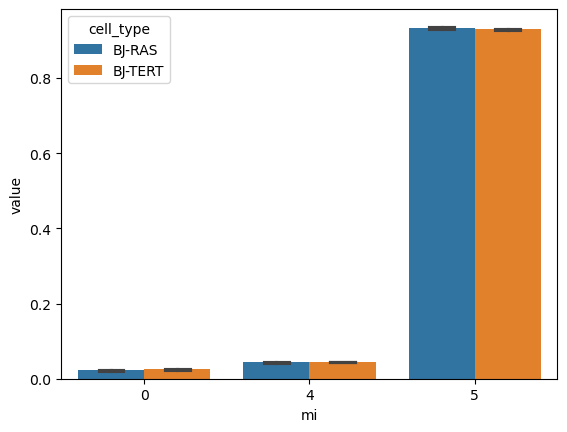

In [63]:
sns.barplot(
    met_mids_for_plot,
    x='mi', y='value', hue='cell_type',
    errorbar=lambda x: [x.min(), x.max()], capsize=0.3
)

In [56]:
met_mids_array = np.zeros(shape=[4, 5 + 1])
met_mids_array[:, (0, 4, 5)] = met_mids['met']\
    .xs(('Cells', 1440, 0), level=('matrix', 'time_minutes', 'with_standards'))

In [57]:
met_mids_array

array([[0.02341881, 0.        , 0.        , 0.        , 0.04568347,
        0.93089772],
       [0.02133091, 0.        , 0.        , 0.        , 0.04188826,
        0.93678083],
       [0.0236446 , 0.        , 0.        , 0.        , 0.04493942,
        0.93141598],
       [0.02626424, 0.        , 0.        , 0.        , 0.04464203,
        0.92909372]])

In [70]:
met_mids_full = met_mids['met']\
    .xs(('Cells', 1440, 0), level=('matrix', 'time_minutes', 'with_standards'))
met_mids_full.insert(loc=1, column=1, value=0)
met_mids_full.insert(loc=2, column=2, value=0)
met_mids_full.insert(loc=2, column=3, value=0)
met_mids_full

mi                             0  1  3  2         4         5
cell_type replicate_nr                                       
BJ-RAS    1             0.023419  0  0  0  0.045683  0.930898
          2             0.021331  0  0  0  0.041888  0.936781
BJ-TERT   1             0.023645  0  0  0  0.044939  0.931416
          2             0.026264  0  0  0  0.044642  0.929094

In [101]:
correct_mid(met_mids_full.iloc[0], 0.992)

array([ 2.34188108e-02, -7.67684788e-08,  1.31537131e-05, -8.89413321e-04,
        8.41328140e-03,  9.69044244e-01])

In [75]:
met_mids_full.iloc[0]

mi
0    0.023419
1    0.000000
3    0.000000
2    0.000000
4    0.045683
5    0.930898
Name: (BJ-RAS, 1), dtype: float64

In [86]:
correction_matrix(5, 0.9) @ np.array([0.02, 0, 0, 0, 0, 0.98])

array([2.000000e-07, 9.000000e-06, 1.620000e-04, 1.458000e-03,
       6.561000e-03, 9.918098e-01])

In [100]:
correction_matrix(5, 0.99) @ np.array([0, 0, 0, 0, 0, 1.0])

array([1.00000000e-10, 4.95000000e-08, 9.80100000e-06, 9.70299000e-04,
       4.80298005e-02, 9.50990050e-01])